In [1]:
%load_ext autoreload

### Finding new Rfam families only

In [2]:
%autoreload
from rna2d.utils import Rfam

rfam142 = "../external-files/rfam-14.2/Rfam.pdb"
rfam148 = "../external-files/rfam-14.8/Rfam.pdb"

rfam = Rfam()
rfam2_mapping = rfam.get_pdb_family_mapping(rfam142)
rfam8_mapping = rfam.get_pdb_family_mapping(rfam148)
print(len(rfam2_mapping), len(rfam8_mapping))

5736 7659


In [3]:
%autoreload
rfam2_ids = set(rfam.get_families_ids(rfam142))
rfam8_ids = set(rfam.get_families_ids(rfam148))

a = rfam2_ids.difference(rfam8_ids)
b = rfam8_ids.difference(rfam2_ids)
i = rfam2_ids.intersection(rfam8_ids)

print(len(rfam2_ids), len(rfam8_ids))
print(f'2vs8: {len(a)}, 8vs2:{len(b)}, intersection:{len(i)}')
print(b)

rfam8_fams = rfam.get_pdb_family_mapping(rfam148, b)
print(len(rfam8_fams))


108 125
2vs8: 5, 8vs2:22, intersection:103
{'RF01415', 'RF00024', 'RF00075', 'RF00106', 'RF01084', 'RF00240', 'RF01357', 'RF00619', 'RF02678', 'RF02681', 'RF03013', 'RF02340', 'RF00012', 'RF00030', 'RF00957', 'RF00007', 'RF04190', 'RF00525', 'RF00507', 'RF01047', 'RF03054', 'RF01330'}
83


In [4]:
print(sorted(list(rfam2_mapping.keys()))[:10])
print(sorted(list(rfam8_mapping.keys()))[:10])

['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']
['1ASY_R', '1ASY_S', '1ASZ_R', '1ASZ_S', '1B23_R', '1C04_E', '1C0A_B', '1C2W_B', '1C2X_C', '1EFW_C']


In [5]:
new_mapping = rfam.get_new_keys_only(rfam2_mapping, rfam8_mapping)
print(len(new_mapping))
print(sorted(list(new_mapping.keys()))[:10])

1977
['1M5K_B', '1M5K_E', '1M5O_B', '1M5O_E', '1M5P_B', '1M5P_E', '1M5V_B', '1M5V_E', '3IZZ_D', '4C9D_C']


### Remove SPOT-RNA training examples

In [6]:
%autoreload 2
import os
from rna2d.utils import get_pdb_ids
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
trpdbs = get_pdb_ids(train_pdbs)

nm = set(new_mapping.keys())
tp = set(trpdbs)
diff = nm.intersection(tp)
print(f'Common: {len(diff)}')

new_mapping = rfam.filter_out_list(trpdbs, new_mapping)
print(len(new_mapping))
print(sorted(trpdbs)[:5])

Common: 1
1976
['1C0A_B', '1DDY_A', '1DK1_B', '1DUL_B', '1FFK_9']


List of missing cif files

In [7]:
new_cifs = os.listdir('/data/2d-rna/new-cifs/cifs')
cifs_ids = [x.replace('.cif', '') for x in new_cifs]
cifs_ids = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in cifs_ids]
out = []
out_ids = []
for a, b in zip(cifs_ids, new_cifs):
    if a in new_mapping:
        out.append(b)
        out_ids.append(a)

# for m in new_mapping:
#     if m not in cifs_ids:
#         print(m)

print(len(out))
print(out[:10])
print(out_ids[:10])

1755
['6OM6_1_5.cif', '6WDJ_1_7.cif', '6WDK_1_7.cif', '7N2U_1_Dt.cif', '7N30_1_Dt.cif', '6Y3G_1_F.cif', '6Y4B_1_F.cif', '6ZTP_1_AX.cif', '6WD5_1_7.cif', '6ZTL_1_AX.cif']
['6OM6_5', '6WDJ_7', '6WDK_7', '7N2U_Dt', '7N30_Dt', '6Y3G_F', '6Y4B_F', '6ZTP_AX', '6WD5_7', '6ZTL_AX']


In [8]:
fams = [new_mapping[p] for p in new_mapping]

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

c = Counter(fams)
vals = list(c.values())
keys = list(c.keys())
vk = sorted(zip(keys, vals), key=lambda x : x[1], reverse=True)
keys = [x[0] for x in vk]
vals = [x[1] for x in vk]


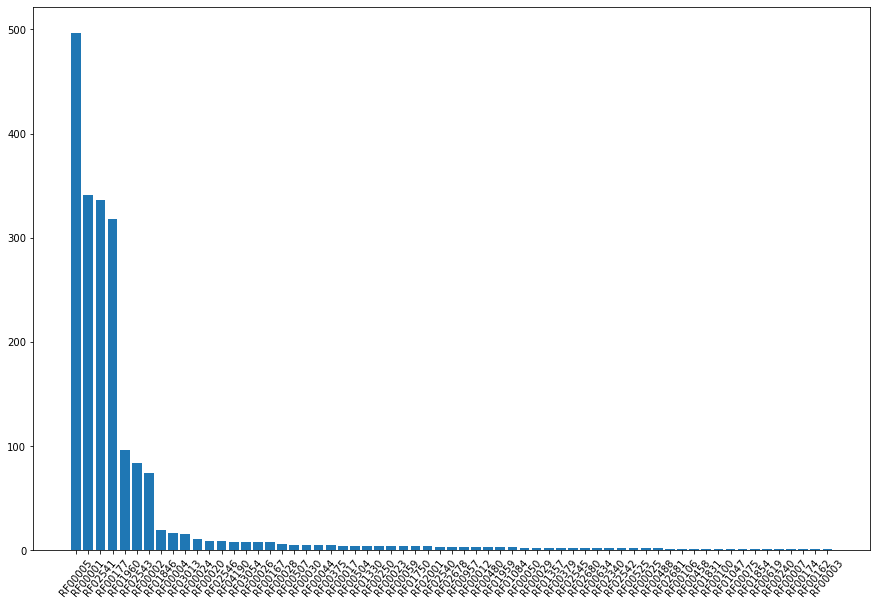

In [10]:
plt.figure(figsize=(15,10))
plt.bar(keys, vals)
_ = plt.xticks(rotation=50)

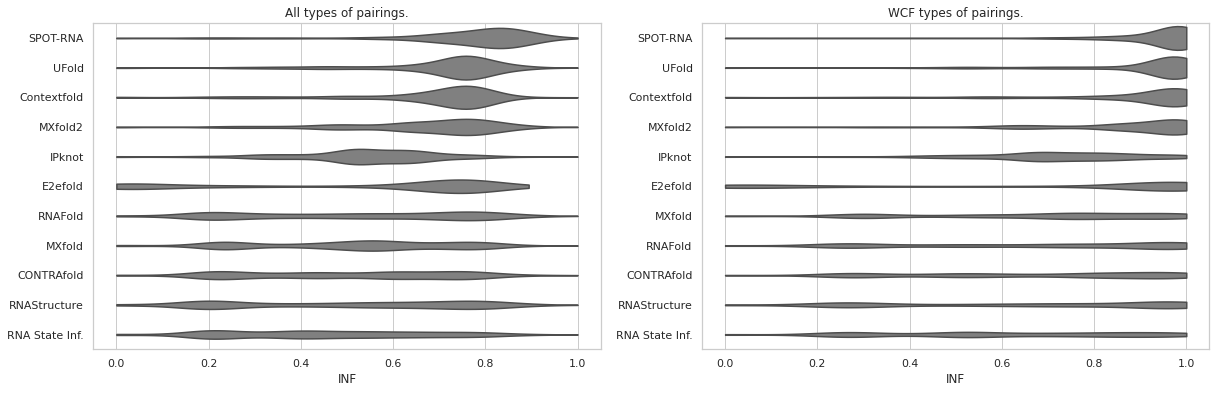

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from rna2d.pipelines import Results
from rna2d.visualization import Violinplot
from rna2d.visualization import SeabornData
from rna2d.pipelines import RfamNew

%autoreload
# means, stds, dfs = get_means_stds(res, conv_ind)
# dfmeans, dfstds = get_DataFrames(means, stds, name='nwc')

# d = get_sns_data(res, dfmeans, get_names())

RFAM142 = "../external-files/rfam-14.2/Rfam.pdb"
RFAM148 = "../external-files/rfam-14.8/Rfam.pdb"
RES_ALL = "/data/2d-rna/new-cifs/validation-all/results.rpt"
RES_WC = "/data/2d-rna/new-cifs/validation-canon/results.rpt"

rfam_all = RfamNew(RES_ALL, RFAM142, RFAM148)
rfam_wc = RfamNew(RES_WC, RFAM142, RFAM148)

res_all, ind_all = rfam_all.get_newest_only(filter = trpdbs)
res_wc, ind_wc = rfam_wc.get_newest_only(filter = trpdbs)

v = Violinplot()
sall = SeabornData(res_all, ind_all)
swc = SeabornData(res_wc, ind_wc)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns_all = sall.get_sns_format_data()
sns_wc = swc.get_sns_format_data()
v.plot(sns_all, axs[0], "All types of pairings.", x_axis=True)
v.plot(sns_wc, axs[1], "WCF types of pairings.", x_axis=True)

In [14]:
from rna2d.utils import get_means_stds, get_DataFrames

all_means, all_stds, all_dfs = get_means_stds(res_all, ind_all, names=True, out_path='../results/all-rfam')
all_dfmeans, all_dfstds = get_DataFrames(all_means, all_stds, out_path="../results/all-rfam", name='all')

In [15]:
all_dfmeans

,PPV,TPR,F1,INF
SPOT-RNA,0.64,0.89,0.74,0.75
UFold,0.55,0.88,0.67,0.69
Contextfold,0.52,0.87,0.65,0.67
MXfold2,0.51,0.83,0.63,0.65
IPknot,0.41,0.70,0.52,0.54
E2efold,0.39,0.70,0.50,0.52
RNAFold,0.41,0.63,0.49,0.51
MXfold,0.39,0.68,0.49,0.51
CONTRAfold,0.40,0.61,0.48,0.50
RNAStructure,0.39,0.63,0.48,0.49
